<a href="https://colab.research.google.com/github/Deok-Hun/Aiffel_Kun/blob/master/EX_15_%EB%8B%A4%EC%96%91%ED%95%9C_OCR%EB%AA%A8%EB%8D%B8_%EB%B9%84%EA%B5%90%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.environ["HOME"]=""
print(os.getenv("HOME"))

In [3]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [4]:
!sudo apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [5]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

In [7]:
!pip install keras-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import keras_ocr
import pytesseract

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.9.1
0.3.10


In [9]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다.
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /.keras-ocr/craft_mlt_25k.h5
Looking for /.keras-ocr/crnn_kurapan.h5


In [10]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_path = os.getenv('HOME')+'/content/drive/MyDrive/Exploration/Exploration_15/images'
image_file_path_1 = image_path + '/1_simle.png'
image_file_path_2 = image_path + '/2_noise.png'
image_file_path_3 = image_path + '/3_narrow.png'
image_file_path_4 = image_path + '/4_rotating.png'
image_file_path_5 = image_path + '/5_glare.png'
image_file_path_6 = image_path + '/6_noise_2.png'

images = [image_file_path_1, image_file_path_2, image_file_path_3, image_file_path_4, image_file_path_5, image_file_path_6]

images = [ keras_ocr.tools.read(image) for image in images]
prediction_groups = [pipeline.recognize([image]) for image in images]

1/1 [==============================] - 0s 37ms/step


## keras-ocr

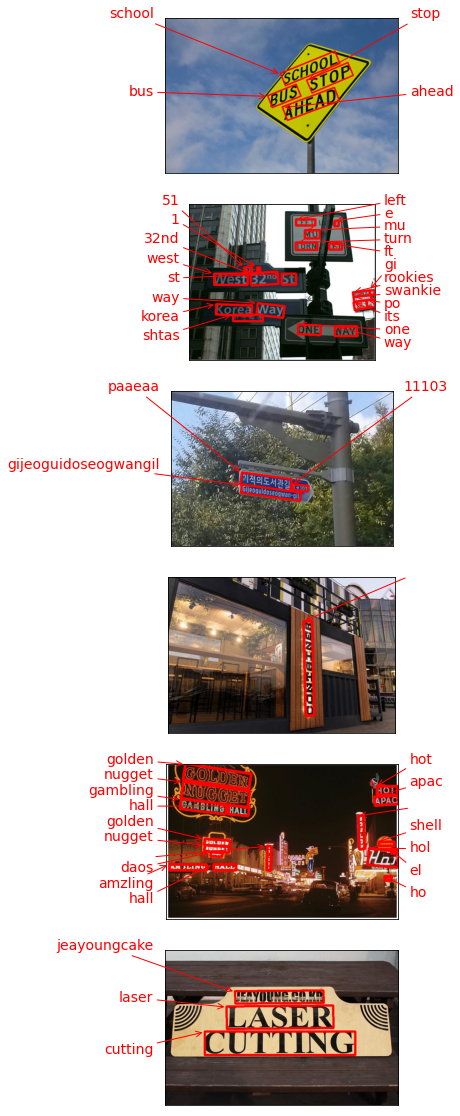

In [11]:
# plot the predictions
fig, axs = plt.subplots(nrows = len(images), figsize = (20,20))
for idx, ax in enumerate(axs):
  keras_ocr.tools.drawAnnotations(image = images[idx], predictions = prediction_groups[idx][0], ax=ax)

## Tesseract

In [58]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./data/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [59]:
def recognize_images(cropped_image_path_list):
  custom_oem_psm_config = r'--oem 3 --psm 7'

  for image_path in cropped_image_path_list:
    image = Image.open(image_path)
    recognized_data = pytesseract.image_to_string(
        image, lang = 'eng',
        config = custom_oem_psm_config,
        output_type = Output.DICT
    )
    print(recognized_data['text'])
  print("Done")

In [60]:
image_path = os.getenv('HOME')+'/content/drive/MyDrive/Exploration/Exploration_15/images'
image_file_path_1 = image_path + '/1_simle.png'

cropped_image_path_list = crop_word_regions(image_file_path_1, image_path)
recognize_images(cropped_image_path_list)

/content/drive/MyDrive/Exploration/Exploration_15/images/0000.png
3 / oop /

Done


In [61]:
image_path = os.getenv('HOME')+'/content/drive/MyDrive/Exploration/Exploration_15/images'
image_file_path_2 = image_path + '/2_noise.png'

cropped_image_path_list = crop_word_regions(image_file_path_2, image_path)
recognize_images(cropped_image_path_list)

/content/drive/MyDrive/Exploration/Exploration_15/images/0000.png
ea

Done


In [62]:
image_path = os.getenv('HOME')+'/content/drive/MyDrive/Exploration/Exploration_15/images'
image_file_path_3 = image_path + '/3_narrow.png'

cropped_image_path_list = crop_word_regions(image_file_path_3, image_path)
recognize_images(cropped_image_path_list)

/content/drive/MyDrive/Exploration/Exploration_15/images/0000.png

Done


In [63]:
image_path = os.getenv('HOME')+'/content/drive/MyDrive/Exploration/Exploration_15/images'
image_file_path_4 = image_path + '/4_rotating.png'

cropped_image_path_list = crop_word_regions(image_file_path_4, image_path)
recognize_images(cropped_image_path_list)

/content/drive/MyDrive/Exploration/Exploration_15/images/0000.png


SystemError: ignored

In [64]:
image_path = os.getenv('HOME')+'/content/drive/MyDrive/Exploration/Exploration_15/images'
image_file_path_5 = image_path + '/5_glare.png'

cropped_image_path_list = crop_word_regions(image_file_path_5, image_path)
recognize_images(cropped_image_path_list)

/content/drive/MyDrive/Exploration/Exploration_15/images/0000.png
en [ '

Done


In [65]:
image_path = os.getenv('HOME')+'/content/drive/MyDrive/Exploration/Exploration_15/images'
image_file_path_6 = image_path + '/6_noise_2.png'

cropped_image_path_list = crop_word_regions(image_file_path_6, image_path)
recognize_images(cropped_image_path_list)

/content/drive/MyDrive/Exploration/Exploration_15/images/0000.png

Done


# 결과 분석과 결론 제시

  * 먼저 keras-ocr 모델에 있어서, 단순 모델은 정확하게 분석하였다.('1_simle.png)
  하지만, 2번째 노이즈가 있는 모델에서 부터는 정확하게 분석하지 못 하였다. 텍스트가 장애물에 의해 가려진다던지 빛 번짐에 의한 이미지에서는 정확하게 추출하지 못하였다.
  다음, 회전된 글자에 있어서는 완전히 분석을 하지 못 하였다.
  * 다음 Tesseract 모델은 연습 모델에서와 달리, 이미지에서 텍스트를 자르지(crop)를 못 하였다. keras에서는 시크멘트처리가 잘 되었는데 Tesseract에서는 문제가 발생하여 제대로 된 리딩이 잘 되지 않았다. 따라서 cropped 된 이미지 자체가 하나씩만 출력되었으며 그 출력된 이미지에서 제대로 된 텍스트를 확인하지 못하였다. 이는 프로젝트 수행하면서 확인해본 결과 'oem' 과 'psm' 과 영향이 있어보이나, 더 많은 방법을 강구해야 할 듯 하다.